In [1]:
import os

import h5py
import torch
from torch import Tensor
from matplotlib import pyplot as plt

from geometry_2d_io import load_scanner_layout_geometries, load_scanner_layouts
from geometry_2d_plot import plot_scanner_from_vertices_2d_mpl
from geometry_2d_utils import fov_tensor_dict

In [2]:
scanner_layouts_dir = "../../../pymatcal/scanner_layouts"
scanner_layouts_filename = "scanner_layouts_77faff53af5863ca146878c7c496c75e.tensor"

ppdfs_dataset_dir = (
    "../../../../data/scanner_layouts_77faff53af5863ca146878c7c496c75e"
)

# Load the scanner layouts
scanner_layouts_data, filename_unique_id = load_scanner_layouts(
    scanner_layouts_dir, scanner_layouts_filename
)

# Define the Field of View (FOV) tensor dictionary


fov_dict = fov_tensor_dict(
    n_pixels=(512, 512),
    mm_per_pixel=(0.25, 0.25),
    center_coordinates=(0.0, 0.0),
)

In [ ]:
# Define the layout index to load
layout_idx = 13

# Load the scanner geometry
plates_vertices, detector_units_vertices = load_scanner_layout_geometries(
    layout_idx, scanner_layouts_data
)

# load the beams masks for the layout
beams_masks_hdf5_filename = (
    f"beams_masks_77faff53af5863ca146878c7c496c75e_{layout_idx:03d}.hdf5"
)
input_dir = "output"
with h5py.File(
    os.path.join(input_dir, beams_masks_hdf5_filename), "r"
) as beams_masks_hdf5:
    beams_masks_hdf5["beam_mask"][:]  # type: ignore
beams_masks: Tensor = torch.from_numpy(beams_masks) # type: ignore

<KeysViewHDF5 ['beam_mask']>


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


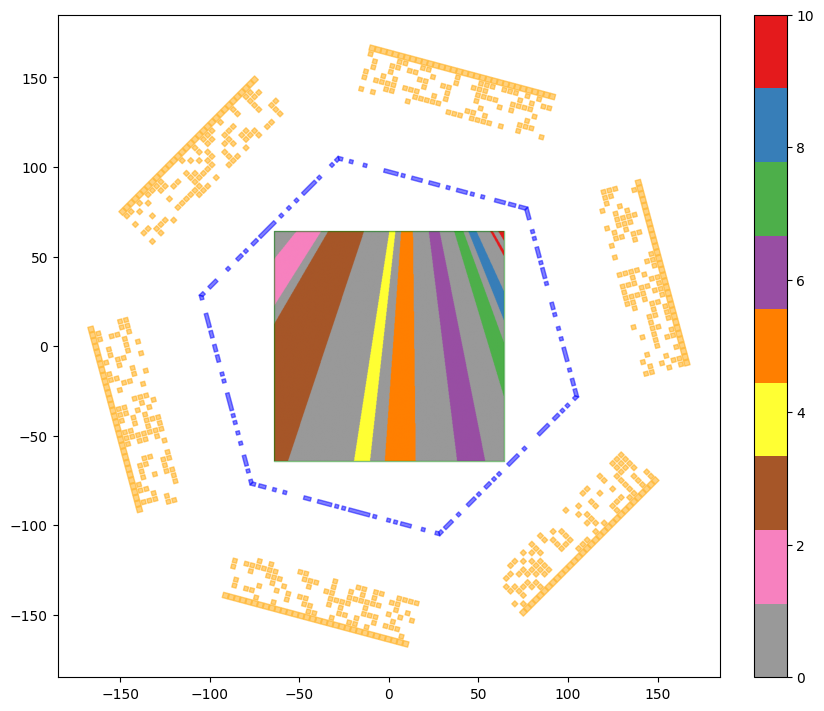

In [21]:
detector_unit_idx = 515
fig, ax = plt.subplots(1, 1, figsize=(8, 7), layout="constrained")
scanner_polycoll = plot_scanner_from_vertices_2d_mpl(
    plates_vertices,
    detector_units_vertices,
    ax,
    fov_dict,
)
ax.set_aspect("equal")
mask_im_obj = ax.imshow(
    beams_masks[detector_unit_idx, :].view(
        int(fov_dict["n pixels"][0]), int(fov_dict["n pixels"][1])
    ).swapaxes(0, 1),
    extent=(-64,64, -64, 64),
    origin="lower",
	cmap='Set1_r'
    # alpha=0.5,
)
ax.autoscale()
fig.colorbar(mask_im_obj)
print(beams_masks[detector_unit_idx, :].unique())